## public scorе на kaggle  0.96943 место 60

# Результат EDA
* Для классификации представлены фотографии 10 категорий автомобилей
* Категории достаточно сбалансированны по колличеству фотографий для обучения
* Размеры фотографий различаются. Ширина 607+-90, высота 450+-50,т.е. если есть время то легко можно делать расчет на 600х400, но мы ограничемся на 320 на 320.
* Всего 15561 фотографий для тренировки и 6675 для конкурса
* Колличество данных не очень большое, поэтому попробуем использовать аугментации для искусственного увеличения данных.

# Аугментации
* Пробовал ImageDataGenerator и albumentations. У второго больше возможностей, но при похожих установках разницы значительной не было обнаружено. 
* образать фон у изображения, очень хорошая идея, но оставим это на будущее

## Пробовал 3 модели 
### model 1
model=Sequential()

model.add(base_model)

model.add(GlobalAveragePooling2D())

model.add(Dense(CLASS_NUM))

* Использовал перенос обучения из Xception, ResNet50V2, EfficientNetB6 (иногда в проекте пишу В7, но всегда В6!).
* Использовал медленное обучение на 4 шага: 

(1) замарожены все слои базовой модели, 

(2) разморожены 1/8 слоев базовой модели, 

(3) разморожена половина словев базовой модели и 

(4) обучение всех слоев. 

Каждый раз понижал шаг обучения. Колличество эпох на каждом шаге 10. На последнем шаге экспоненциальное снижение шага обучения.

* В конце деллал аугментацию тестовых данных 5-11 раз. 
* Все 3 базовые модели показывают очень близкие результаты. На разрешении 90х120 полчил оценку 0.84-0.86.

вторая модель имеет такую архитектуру
### model 2
model=Sequential()

model.add(base_model)

model.add(GlobalMaxPool2D())

model.add(Dropout(0.35))

model.add(Flatten())

model.add(Dense(256,activation="elu"))

model.add(Dropout(0.25))

model.add(Dense(CLASS_NUM))

* Добавление дополнительных выходных слоев, как показали тесты не сильно помогает, как это и утверждалось в курсе, что и понятно, ведь там и так много таких слоев.

### model 3
* Модель 3 повторяет модель 2 по архитектуре, только с увеличенным разрешением картинок до 320х320. Как результат, качество увеличилось и оценка стала 0.96344 на одной модели. Далее показаны кратко установки моделей, изменение парамеров и результаты и варианты объединения предсказания разных моделей.

# Лучший результат: кажется Бустинг.
1. объединение результата модели3 с тремя разными базовыми моделями.
2. Затем по верх этих предсказаний обучение, используя случайный лес и добавление к предыдущим предсказаниям. 
3. Затем обучение используя все 4 предсказания (вероятности, данные не нормировались) в качестве метапараметров.
4. Финальное обучение логрегрессией и предсказание классов. 
* public scorе  0.96943 место 60

# Усреднение показаний трех model3: EfficientNetB6+ResNet50V2+Xception + TTA x11
* public score 0.96853
* лучше чем любая из моделей в отдельности и лучше, чем без ТТА
* TTA x 11

# Усреднение показаний трех model3: EfficientNetB6+ResNet50V2+Xception
* public score 0.96779
* лучше чем любая из моделей в отдельности. 

# Model 3 - EfficientNetB6
* add output Dense 256 elu layer 
* 4 step fine tuning x10 eprochs
* normalization
* albumentations, 
* TTAx11,
* Accuracy: 95.92%
* public score 0.96194
* increase the image size to 320x320 from 120x90 before


# Model 3 - ResNet50V2
* add output Dense 256 elu layer 
* 4 step fine tuning x10 eprochs
* normalization
* albumentations, 
* TTAx11,
* Accuracy: 96.30%
* public score 0.96374
* increase the image size to 320x320 from 120x90 before

# Model 3 - Xception
* add output Dense 256 elu layer 
* 4 step fine tuning x10 eprochs
* normalization
* albumentations, 
* TTAx11,
* Accuracy: 96.46%
* public score  0.96344
* increase the image size to 320x320 from 120x90 before

# Model 2 - ResNet50V2
* add output Dense 256 elu layer 
* 4 step fine tuning x10 eprochs
* normalization
* albumentations, 
* TTAx5,
* Accuracy: 82.18%
* public score 0.84853

# Model 1 - ResNet50V2
* 4 step fine tuning x10 eprochs
* normalization
* no albumentations, 
* TTAx5,
* Accuracy: 84.17%
* public score 0.86591

# Model 1 - Xception
* 4 step fine tuning x10 eprochs
* normalization
* no albumentations, 
* TTAx5,
* Accuracy: 85.11%
* public score 0.86187

# Model 1 - EfficientNetB6
* 4 step fine tuning x10 eprochs
* no normalization
* no albumentations, 
* TTAx5,
* Accuracy: 85.11%
* public score 0.85992

# Что можно еще сделать или сделать лучше?
* Нужно чаще сохранять и модели и предсказания, а то они могут пригодитсья. Например, можно было бы построить нормальный бустинг на слабых предсказаниях, которых во время теста я и так много пробовал.
* Увеличить разрешение на последнем шаге обучения. Я зафиксировал разрешение на продежении всго тонкого дообучения. Видел в других проектах это помогало, но уже нет GPU на такие эксперименты.
* Образать фон у изображения, очень хорошая идея, но оставим для будущих проектов.
* Побольше поэкспериментировать и почитать про аугментацию.
* Просмотреть все данные, на которых ошибается модель на обучении. Если есть ошибки в классификации, то исправить или убрать изображения. Если картинки плохого качества, то можно попытаться их улучшить. 

# Что удалось?
* Удалось улучшить модель по сравнению с базовой моделью.
* Удалось использовать ансамблирование моделей для улучшения метрики.
* Применить EDA. Так анализ показал, что данных больше, чем было использовано, т.к. среднее разрешение картинок больше используемого.
* В конце проекта понял, что нужно сохранять модели и загружать их на каггл, что значительно сократило время и размер проекта. Это также позволило все то ансамблирование, которое я попробовал.

In [ ]:
# проверяем, что видеокарта подключена
!nvidia-smi -L

In [ ]:
# подготавливаем данные

# для Google Colab: excecute once 
if False:
    !gsutil cp gs://oleg-zyablov/skillfactory/sf-dl-car-classification.zip .
    !unzip sf-dl-car-classification.zip
    !unzip -q -o sf-dl-car-classification/train.zip
    !unzip -q -o sf-dl-car-classification/test.zip
    sample_submission_path = '/content/sf-dl-car-classification/sample-submission.csv'
    train_path = '/content/train/'
    sub_path = '/content/test_upload/'
    from google.colab import drive
    drive.mount('drive')

In [35]:
%cd /
#!dir
# для Kaggle Kernel
if True:
    !mkdir /kaggle/temp #папка для временных файлов
    #!unzip -q /kaggle/input/train.zip -d /kaggle/temp
    #!unzip -q /kaggle/input/test.zip -d /kaggle/temp
    #sample_submission_path = '/kaggle/input/sample-submission.csv'
    !unzip -q kaggle/input/sf-dl-car-classification/test.zip -d /kaggle/temp
    !unzip -q kaggle/input/sf-dl-car-classification/train.zip -d /kaggle/temp
    sample_submission_path = '/kaggle/input/sf-dl-car-classification/sample-submission.csv'
    train_path = '/kaggle/temp/train/'
    sub_path = '/kaggle/temp/test_upload/'
    %cd /
    %cd /kaggle/working  #переходим в рабочую директорию

/
/
[Errno 2] No such file or directory: '/kaggle/working #переходим в рабочую директорию'
/


In [36]:
#имена классов
class_names = [
  'Приора', #0
  'Ford Focus', #1
  'Самара', #2
  'ВАЗ-2110', #3
  'Жигули', #4
  'Нива', #5
  'Калина', #6
  'ВАЗ-2109', #7
  'Volkswagen Passat', #8
  'ВАЗ-21099' #9
]

In [37]:
# импорты

import os, re, math, random, time, gc, string, pickle, shutil, pathlib, itertools
import numpy as np, pandas as pd, matplotlib.pyplot as plt, PIL

import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import *
from tensorflow.keras.activations import *
from tensorflow.keras.applications import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.layers import *
from tensorflow.keras.layers.experimental.preprocessing import *
from tensorflow.keras.losses import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.optimizers.schedules import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from PIL import Image
from IPython.display import clear_output
from tqdm.notebook import tqdm

# аугментации
!pip install tensorflow_addons -q
import tensorflow_addons as tfa
!pip install albumentations -q -U

In [38]:
import seaborn as sns
import os
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, LabelBinarizer
from sklearn.metrics import roc_curve, roc_auc_score, auc, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import mutual_info_classif
import itertools
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
import json
from sklearn.tree import DecisionTreeClassifier

In [5]:
def plot_history(history):
    plt.figure(figsize=(10,5))
    #plt.style.use('dark_background')
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'g', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    #plt.figure()
    plt.figure(figsize=(10,5))
    #plt.style.use('dark_background')
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'g', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

In [6]:
RANDOM_SEED = 42  # фиксируем состояние генератора псевдо-случайных чисел для воспроизводимости результата
np.random.seed(RANDOM_SEED)
os.environ['PYTHONHASHSEED'] = '0'

# EDA

In [7]:
%cd /
%cd kaggle/input/sf-dl-car-classification/
!dir
df_train = pd.read_csv("train.csv")
df_sub=pd.read_csv("sample-submission.csv")

/
/kaggle/input/sf-dl-car-classification
sample-submission.csv  test.zip  train.csv  train.zip


In [8]:
# check nan
dfe1 = df_train["Category"].isna().sum()
dfe2 = df_train["Id"].isna().sum()
print(f"nan in category {dfe1} , nan in ID {dfe2}")

# check unique
dfe1 = len(df_train["Category"].unique())
dfe2 = len(df_train["Id"].unique())

print(f"unique in category {dfe1} , unique in ID {dfe2}")
print(f"total lenght of training data is {len(df_train)}")
print(f"total lenght of training data is {len(df_sub)}")

nan in category 0 , nan in ID 0
unique in category 10 , unique in ID 15561
total lenght of training data is 15561
total lenght of training data is 6675


mean number of images in each category 1556.1


<AxesSubplot:xlabel='Category'>

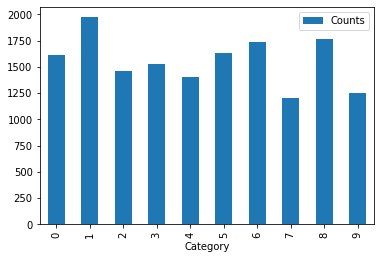

In [9]:
df_group = df_train.groupby(["Category"]).count()
df_group.columns = ['Counts']
print(f"mean number of images in each category {np.mean(df_group.Counts)}")
#print(df_group.sample())
df_group.plot.bar()

In [10]:
%cd '/kaggle/temp/train/'
import os,glob

folder_path = ''
df_train['img_size_w'] = 0
df_train['img_size_h'] = 0
for category in range(10):
    print(f"in folder {category}")
    folder_path=f"{category}/"
    for filename in glob.glob(os.path.join(folder_path, '*.jpg')):
        #with open(filename, 'r') as f:
        with PIL.Image.open(filename,'r') as  image:
            filename=filename[2:]
            width, height = image.size
            df_train.loc[df_train.Id==filename,"img_size_w"]=width
            df_train.loc[df_train.Id==filename,"img_size_h"]=height

[Errno 2] No such file or directory: '/kaggle/temp/train/'
/kaggle/input/sf-dl-car-classification
in folder 0
in folder 1
in folder 2
in folder 3
in folder 4
in folder 5
in folder 6
in folder 7
in folder 8
in folder 9


([<matplotlib.axis.XTick at 0x7f989ea84190>,
 [Text(1, 0, 'width'), Text(2, 0, 'height')])

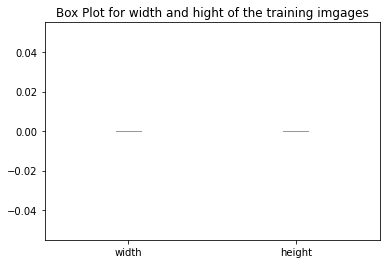

In [11]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot for width and hight of the training imgages')
ax1.boxplot(df_train[["img_size_w","img_size_h"]])
plt.xticks([1, 2], ['width', 'height'])

mean img width 0.0, and img height 0.0
std img width 0.0, and img height 0.0


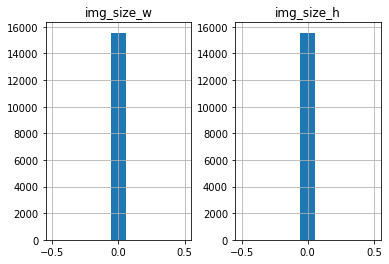

In [12]:
hist = df_train[["img_size_w","img_size_h"]].hist(bins=9)
print(f"mean img width {np.mean(df_train.img_size_w)}, and img height {np.mean(df_train.img_size_h)}")
print(f"std img width {np.std(df_train.img_size_w)}, and img height {np.std(df_train.img_size_h)}")

# Результат EDA
* Для классификации представлены фотографии 10 категорий автомобилей
* Категории достаточно сбалансированны по колличеству фотографий для обучения
* Размеры фотографий различаются. Ширина 607+-90, высота 450+-50,т.е. если есть время то легко можно делать расчет на 600х400, но мы ограничемся на 320 на 320.
* Всего 15561 фотографий для тренировки и 6675 для конкурса
* Колличество данных не очень большое, поэтому попробуем использовать аугментации для искусственного увеличения данных.

In [13]:
%cd /
%cd kaggle/working
!dir

/
/kaggle/working
__notebook_source__.ipynb


In [14]:
# В сетап выношу основные настройки, так удобней их перебирать в дальнейшем

EPOCHS               = 10
EPOCHS1              = 10
EPOCHS2              = 10
EPOCHS3              = 10
EPOCHS4              = 10

BATCH_SIZE           = 32
VAL_SPLIT            = 0.2

CLASS_NUM            = 10
IMG_SIZE_H           = 320 # 90
IMG_SIZE_W           = 320 # 120
IMG_CHANNELS         = 3
image_size           = (IMG_SIZE_H, IMG_SIZE_W)
input_shape          = (IMG_SIZE_H, IMG_SIZE_W, IMG_CHANNELS)
lossFunction = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

**Создаем генераторы изображений ImageDataGenerator и albumentations**

In [108]:
import albumentations as Alb


def augment(image):
  image = image.astype(np.float)
  aug = Alb.Compose([
      Alb.CoarseDropout (p=0.7, max_holes=2, max_height=10, max_width=20),
      Alb.HorizontalFlip(p=0.5),
      Alb.ShiftScaleRotate(rotate_limit=[-7,7], p=0.7),
      Alb.ChannelShuffle(p=0.8),
      Alb.Affine(rotate=(-10,10), shear=(-5,5),interpolation=1, cval=0, cval_mask=0, mode=0,p=0.5)
      # https://albumentations.ai/docs/api_reference/augmentations/transforms/
      # https://albumentations.ai/docs/examples/example/
  ])
  return aug(image=image)['image']

#1
train_datagen = ImageDataGenerator(
    #rescale=1./255,
    preprocessing_function=augment,
    validation_split=VAL_SPLIT,
)

# пробовал 2 варианта аугментаций данных для тренинга

#1
"""
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=[0.75, 1.25],
    channel_shift_range=100,
    brightness_range=(0.5, 1.5),
    height_shift_range=0.1,
    width_shift_range=0.1,
    validation_split=VAL_SPLIT,
)"""


val_datagen = ImageDataGenerator(
    #rescale=1./255,
    validation_split=VAL_SPLIT,
)



train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    seed=0,
    subset='training'
)

val_generator = val_datagen.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    seed=0,
    subset='validation'
)

Found 12452 images belonging to 10 classes.
Found 3109 images belonging to 10 classes.


# образать фон у изображения, очень хорошая идея, но оставим для будущих проектов

Train:


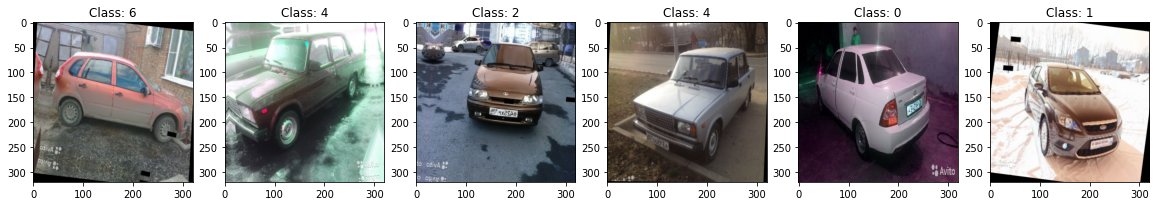

Val:


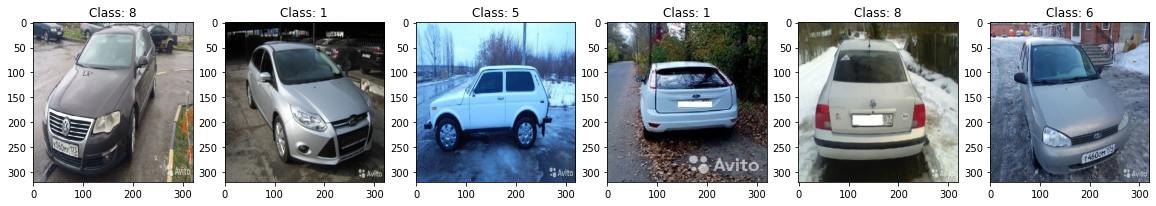

In [109]:
def show_first_images(generator, count=6, labels=True, figsize=(20, 5), normalized=False):
  generator = itertools.islice(generator, count)
  fig, axes = plt.subplots(nrows=1, ncols=count, figsize=figsize)
  for batch, ax in zip(generator, axes):
    if labels:
      img_batch, labels_batch = batch
      img, label = img_batch[0], np.argmax(labels_batch[0]) #берем по одному изображению из каждого батча
    else:
      img_batch = batch
      img = img_batch[0]
    if not normalized:
      #img = img.astype(np.float)
       img = img.astype(np.uint8)
    ax.imshow(img)
    # метод imshow принимает одно из двух:
    # - изображение в формате uint8, яркость от 0 до 255
    # - изображение в формате float, яркость от 0 до 1
    if labels:
      ax.set_title(f'Class: {label}')
  plt.show()

print('Train:')
show_first_images(train_generator)

print('Val:')
show_first_images(val_generator)


# Model

In [ ]:
STEPS_PER_EPOCH = len(train_generator)
STEPS_PER_VAL = len(val_generator)

In [ ]:
#STEPS_PER_EPOCH = 2
#STEPS_PER_VAL = 2

In [ ]:
# тут я менял руками базовую модель и архитектуру
# и часть кода далее запускал. затем сохранял последнюю лучшую модель на четвертом шагу

# Xception   # rescale 21M
# ResNet50V2 # rescale 23.5M
# EfficientNetB6 # 41M
base_model = EfficientNetB6(weights='imagenet', include_top=False, input_shape=input_shape)
# base_model.summary()

# model 2,3
model=Sequential()
model.add(base_model)
model.add(GlobalMaxPool2D())
model.add(Dropout(0.35))
model.add(Flatten())
model.add(Dense(256,activation="elu"))
#model.add(BatchNormalization(axis=1)), # можно было бы добавить, но я же использую елу, с ней не нужно
model.add(Dropout(0.25))
model.add(Dense(CLASS_NUM))

# model 1
"""
model=Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D(),)
model.add(Dense(CLASS_NUM))
"""
model.summary()

In [ ]:
# сколько слоев
print(f"number of layers is a base model {len(base_model.layers)}")
print(f"number of layers is a model {len(model.layers)}")

# Fine tunning, step 1

In [ ]:
# first: train only the top layers (which were randomly initialized)
base_model.trainable = False
print(f"number of trainable variables {len(model.trainable_variables)}")
for layer in model.layers:
    print(layer, layer.trainable)

# Fit 1

In [ ]:
LR=0.001
model.compile(
    loss=lossFunction,
    optimizer=Adam(learning_rate=LR),#ExponentialDecay(1e-3, 100, 0.9) https://keras.io/api/optimizers/learning_rate_schedules/
    metrics=['accuracy']
)
# ExponentialDecay, InverseTimeDecay или PiecewiseConstantDecay

In [ ]:
best_model_name = 'best_model1_step1.hdf5'
checkpoint = ModelCheckpoint(best_model_name, monitor = 'val_accuracy', verbose = 1  , mode = 'max', save_best_only=True)
earlystop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
checkNaN = TerminateOnNaN()
ReduceLR = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.0001)
callbacks_list = [checkpoint,checkNaN,ReduceLR] #earlystop checkNaN, ReduceLR

# Обучаем https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit
history = model.fit(
        train_generator,
        steps_per_epoch = STEPS_PER_EPOCH,
        validation_data = val_generator, 
        validation_steps = STEPS_PER_VAL,
        batch_size=BATCH_SIZE,
        epochs = EPOCHS1,
        callbacks = callbacks_list
)

In [ ]:
plot_history(history)

In [ ]:
model.save('model1_last.hdf5')
model.load_weights(best_model_name)

In [ ]:
scores = model.evaluate(val_generator, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

# Step 2

In [ ]:
base_model.trainable = True
# Fine-tune from this layer onwards (last 1/8th layers)
fine_tune_at = 7*len(base_model.layers)//8
# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))
print("Number of trainable variables: ", len(base_model.trainable_variables))
print(f"fine tune for the last {len(base_model.layers)-fine_tune_at} layers")

# Check the trainable status of the individual layers
for layer in model.layers:
    print(layer, layer.trainable)

In [ ]:
LR=0.0005
model.compile(
    loss=lossFunction,
    optimizer=Adam(learning_rate=LR),#ExponentialDecay(1e-3, 100, 0.9) https://keras.io/api/optimizers/learning_rate_schedules/
    metrics=['accuracy']
)
#model.summary()

In [ ]:
best_model_name = 'best_model3_EfficientNetB7_step2.hdf5'
checkpoint = ModelCheckpoint(best_model_name, monitor = 'val_accuracy', verbose = 1  , mode = 'max', save_best_only=True)
earlystop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
checkNaN = TerminateOnNaN()
ReduceLR = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.00001)
callbacks_list = [checkpoint,checkNaN,ReduceLR] #earlystop checkNaN, ReduceLR

history = model.fit(
        train_generator,
        steps_per_epoch = STEPS_PER_EPOCH,
        validation_data = val_generator, 
        validation_steps = STEPS_PER_VAL,
        batch_size=BATCH_SIZE,
        epochs = EPOCHS2,
        callbacks = callbacks_list
)

In [ ]:
plot_history(history)

In [ ]:
model.save('model1_last_step2.hdf5')
model.load_weights(best_model_name)

In [ ]:
scores = model.evaluate(val_generator,verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

# Step 3

In [ ]:
%cd /
%cd kaggle/input/carmodels
!dir

model = keras.models.load_model('best_model3_EfficientNetB7_step2.hdf5')

%cd /
%cd kaggle/working
!dir

In [ ]:
base_model.trainable = True
# Fine-tune from this layer onwards (last half of the layers)
fine_tune_at = len(base_model.layers)//2
# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))
print("Number of trainable variables: ", len(base_model.trainable_variables))
print(f"fine tune for the last {len(base_model.layers)-fine_tune_at} layers")

# Check the trainable status of the individual layers
for layer in model.layers:
    print(layer, layer.trainable)

In [ ]:
LR=0.0001
model.compile(
    loss=lossFunction,
    optimizer=Adam(learning_rate=LR),#ExponentialDecay(1e-3, 100, 0.9) https://keras.io/api/optimizers/learning_rate_schedules/
    metrics=['accuracy']
)

In [ ]:
best_model_name = 'best_model3_EfficientNetB7_step3.hdf5'
checkpoint = ModelCheckpoint(best_model_name, monitor = 'val_accuracy', verbose = 1  , mode = 'max', save_best_only=True)
earlystop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
checkNaN = TerminateOnNaN()
ReduceLR = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.00001)
callbacks_list = [checkpoint,checkNaN,ReduceLR] #earlystop checkNaN, ReduceLR

history = model.fit(
        train_generator,
        steps_per_epoch = STEPS_PER_EPOCH,
        validation_data = val_generator, 
        validation_steps = STEPS_PER_VAL,
        batch_size=BATCH_SIZE,
        epochs = EPOCHS3,
        callbacks = callbacks_list
)

In [ ]:
plot_history(history)

In [ ]:
model.save('model1_last_step3.hdf5')
model.load_weights(best_model_name)

In [ ]:
scores = model.evaluate(val_generator, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

# Final step 4

In [ ]:
'''
# иногда приходится доучивать модель и загружать предыдущие шаги, если она прервалась 
%cd /
%cd kaggle/input/carmodels
!dir

model = keras.models.load_model('best_model3_EfficientNetB7_step3.hdf5')

%cd /
%cd kaggle/working
!dir
'''

In [ ]:
base_model.trainable = True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))
print("Number of trainable variables: ", len(base_model.trainable_variables))
print("Number of trainable variables in the whole model: ", len(model.trainable_variables))

# Check the trainable status of the individual layers
for layer in model.layers:
    print(layer, layer.trainable)

In [ ]:
#LR=0.00001
model.compile(
    loss=lossFunction,
    optimizer=Adam(learning_rate=ExponentialDecay(1e-4, 100, 0.9)),# https://keras.io/api/optimizers/learning_rate_schedules/
    metrics=['accuracy']
)

In [ ]:
best_model_name = 'best_model_EfficientNetB7_step4.hdf5'
checkpoint = ModelCheckpoint(best_model_name, monitor = 'val_accuracy', verbose = 1  , mode = 'max', save_best_only=True)
earlystop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
checkNaN = TerminateOnNaN()
callbacks_list = [checkpoint,checkNaN] #earlystop checkNaN, ReduceLR


history = model.fit(
        train_generator,
        steps_per_epoch = STEPS_PER_EPOCH,
        validation_data = val_generator, 
        validation_steps = STEPS_PER_VAL,
        batch_size=BATCH_SIZE,
        epochs = EPOCHS4,
        callbacks = callbacks_list
)

In [ ]:
plot_history(history)

In [ ]:
model.save('model1_last_step4.hdf5')
model.load_weights(best_model_name)

In [ ]:
scores = model.evaluate(val_generator, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

In [ ]:

%cd /
%cd kaggle/input/carmodels
!dir

#model = keras.models.load_model('best_model_ResNet50V2_step4.hdf5')
#model = keras.models.load_model('best_model_Xception_step4.hdf5')
model = keras.models.load_model('best_model3_EfficientNetB7_step4.hdf5')

%cd /
%cd kaggle/working
!dir


# Test-time augmentations (TTA)

In [106]:
sub_datagen = ImageDataGenerator(
    #rescale=1.0/255,
    #preprocessing_function=augment
    horizontal_flip=True,
    rotation_range=10,
    shear_range=0.2,    
    brightness_range=(0.8, 1.2)
)

sub_generator = sub_datagen.flow_from_dataframe( 
    dataframe=pd.read_csv(sample_submission_path),
    directory=sub_path,
    x_col="Id",
    y_col=None,
    class_mode=None,
    target_size=image_size,
    batch_size=BATCH_SIZE,
    shuffle=False
)

show_first_images(sub_generator, labels=False)
sub_generator.reset()
show_first_images(sub_generator, labels=False)

Found 6675 validated image filenames.


NameError: name 'show_first_images' is not defined

In [ ]:
num_TTA = 11

# Сделаем предсказания 11 раз:
predictions = []
for _ in range(num_TTA):
  predictions.append(model.predict(sub_generator, verbose=1))
  sub_generator.reset()
predictions = np.array(predictions)
predictions.shape
# Нулевая ось - номер попытки, первая ось - номер изображения, вторая ось - номер класса. 

# Теперь нам нужно сделать усреднение по номеру попытки, а затем argmax по номеру класса (не наоборот!):
final_predictions = predictions.mean(axis=0).argmax(axis=-1)
final_predictions

# Вариант TTA
# зависит, если на 10 аугментациях все хорошо, то принимаем класс, если еще не точно, то делаем дальше, используя псевдолейблинг
# можно делать больше предсказаний, или что эффективно делать больше предсказаний только на сомнительных случаях, как это сделать?

Посмотрим насколько совпали предсказания на каждом изображении с разными аугментациями (цвет на изображении означает класс):

In [ ]:
plt.figure(figsize=(15, 3))
plt.imshow(predictions.argmax(axis=-1)[:, :50], cmap='nipy_spectral')
plt.xlabel('Номер изображения')
plt.ylabel('Номер попытки')
plt.show()

In [ ]:
submission = pd.DataFrame({
    'Id': sub_generator.filenames,
    'Category': final_predictions
}, columns=['Id', 'Category'])
submission.to_csv('submission_model3_EfficientNetB7_320.csv', index=False)

In [ ]:
# !cp submission_model1.csv "drive/My Drive/Colab Notebooks/out"

# Confusion matrix and Classification report

In [ ]:
%cd /
%cd kaggle/input/carmodels
!dir

modelRN = keras.models.load_model('best_model_ResNet50V2_step4.hdf5')
modelXC = keras.models.load_model('best_model_Xception_step4.hdf5')
modelEN = keras.models.load_model('best_model3_EfficientNetB7_step4.hdf5') # it is B6 in fact
%cd /
%cd kaggle/working
!di

In [ ]:
val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.5,
)

val_cm_datagen = val_datagen.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False,
    seed=0,
    subset='validation'
)

In [ ]:
val_datagen = ImageDataGenerator(
    #rescale=1./255,
    validation_split=0.5,
)

val_cmnor_datagen = val_datagen.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False,
    seed=0,
    subset='validation'
)

In [ ]:
#Confution Matrix and Classification Report
val_cm_datagen.reset() # resetting generator
Y_pred = modelRN.predict(val_cm_datagen, STEPS_PER_VAL)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(val_cm_datagen.classes, y_pred))
print('Classification Report')
target_names = ['0','1','2','3','4','5','6','7','8','9']
print(classification_report(val_cm_datagen.classes, y_pred, target_names=target_names))
y_predRN = y_pred

In [ ]:
#Confution Matrix and Classification Report
val_cm_datagen.reset() # resetting generator
Y_pred = modelXC.predict(val_cm_datagen, STEPS_PER_VAL)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(val_cm_datagen.classes, y_pred))
print('Classification Report')
target_names = ['0', '1', '2' , '3' ,'4','5', '6','7','8','9']
print(classification_report(val_cm_datagen.classes, y_pred, target_names=target_names))
y_predXC = y_pred

In [ ]:
#Confution Matrix and Classification Report
val_cmnor_datagen.reset() # resetting generator
Y_pred = modelEN.predict(val_cmnor_datagen, STEPS_PER_VAL)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(val_cmnor_datagen.classes, y_pred))
print('Classification Report')
target_names = ['0', '1', '2' , '3' ,'4','5', '6','7','8','9']
print(classification_report(val_cmnor_datagen.classes, y_pred, target_names=target_names))
y_predEN = y_pred

# ROC AUC
польза не очевидна, не понятно, почему строит только 2 точки, оставим до лучших времен

In [ ]:
# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))
all_labels = ['0', '1', '2' , '3' ,'4','5', '6','7','8','9']


def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(all_labels): # all_labels: no of the labels, for ex. ['cat', 'dog', 'rat']
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label,auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)

# calling
#val_cm_datagen.reset() # resetting generator
#y_pred = model.predict(val_cm_datagen, verbose = True)
#y_pred = np.argmax(y_pred, axis=1)
ra_score = multiclass_roc_auc_score(val_cm_datagen.classes, y_pred)
print(f"roc_auc_score = {ra_score}")
# https://gist.github.com/RyanAkilos/3808c17f79e77c4117de35aa68447045

In [ ]:
multiclass_roc_auc_score(val_cm_datagen.classes, y_pred)

* Модели делают разные ошибки, значит их усреднение или использование их предсказаний, как метаданных может быть успешным.
* основные ошибки возникают у моделей 8 и 10 (или 7 и 9)

In [ ]:
print(f"основные ошибки между маркой {class_names[7]} и {class_names[9]}")

# Усреднение показаний трех моделей

In [110]:
# одна модель не требует нормализации, поэтому нужно создавать тут 2 генератора изображений 

sub_datagen = ImageDataGenerator(
    #rescale=1.0/255,
    #preprocessing_function=augment
    horizontal_flip=True,
    rotation_range=10,
    shear_range=0.2,    
    brightness_range=(0.8, 1.2)
)

sub_generator = sub_datagen.flow_from_dataframe( 
    dataframe=pd.read_csv(sample_submission_path),
    directory=sub_path,
    x_col="Id",
    y_col=None,
    class_mode=None,
    target_size=image_size,
    batch_size=BATCH_SIZE,
    shuffle=False
)


sub_res_datagen = ImageDataGenerator(
    rescale=1.0/255,
    #preprocessing_function=augment
    horizontal_flip=True,
    rotation_range=10,
    shear_range=0.2,    
    brightness_range=(0.8, 1.2)
)

sub_res_generator = sub_res_datagen.flow_from_dataframe( 
    dataframe=pd.read_csv(sample_submission_path),
    directory=sub_path,
    x_col="Id",
    y_col=None,
    class_mode=None,
    target_size=image_size,
    batch_size=BATCH_SIZE,
    shuffle=False
)


Found 6675 validated image filenames.
Found 6675 validated image filenames.


In [ ]:
# модели дают очень близкий результат, поэтому можно сложить с равными весами
predictions = modelRN.predict(sub_res_generator, verbose=1) \
            + modelXC.predict(sub_res_generator, verbose=1) \
            +  modelEN.predict(sub_generator, verbose=1)
predictions = predictions.argmax (axis=1)
predictions

submission = pd.DataFrame({
    'Id': sub_generator.filenames,
    'Category': predictions
}, columns=['Id', 'Category'])

In [ ]:
submission.to_csv('submission_model3_avg3_320.csv', index=False)

# Усреднение показаний трех моделей TTA
не сразу усредним, а запишем предсказания сначала, так как они нам еще пригодятся

## ResNet50v2

In [ ]:
num_TTA = 11
# Сделаем предсказания 11 раз:
predictions = []
for _ in range(num_TTA):
    predictions.append(modelRN.predict(sub_res_generator, verbose=1))
    sub_generator.reset()
    sub_res_generator.reset()
predictions = np.array(predictions)
predictions.shape
np.save("predictions_modelRN_TTA11.npy",predictions)

## Xception

In [ ]:
num_TTA = 11
# Сделаем предсказания 11 раз:
predictions = []
for _ in range(num_TTA):
    predictions.append(modelXC.predict(sub_res_generator, verbose=1))
    sub_generator.reset()
    sub_res_generator.reset()
predictions = np.array(predictions)
predictions.shape
np.save("predictions_modelXC_TTA11.npy",predictions)

## EfficientNetB6

In [ ]:
num_TTA = 11
# Сделаем предсказания 11 раз:
predictions = []
for _ in range(num_TTA):
    predictions.append(modelEN.predict(sub_generator, verbose=1))
    sub_generator.reset()
    sub_res_generator.reset()
predictions = np.array(predictions)
predictions.shape
np.save("predictions_modelEN_TTA11.npy",predictions)

## Загрузим результаты всех трех моделей с усреднением Model3 TTA11 predictions

In [16]:
%cd /
%cd kaggle/input/carmodels
!dir

predictionsRN=np.load("predictions_modelRN_TTA11.npy")
predictionsEN=np.load("predictions_modelEN_TTA11.npy")
predictionsXC=np.load("predictions_modelXC_TTA11.npy")

%cd /
%cd kaggle/working
!dir

/
/kaggle/input/carmodels
best_model3_EfficientNetB7_step4.hdf5  predictions_modelXC_TTA11.npy
best_model_ResNet50V2_step4.hdf5       predictions_trainall_modelEN.npy
best_model_Xception_step4.hdf5	       predictions_trainall_modelRN.npy
predictions_modelEN_TTA11.npy	       predictions_trainall_modelXC.npy
predictions_modelRN_TTA11.npy
/
/kaggle/working
__notebook_source__.ipynb


In [ ]:
# Нулевая ось - номер попытки, первая ось - номер изображения, вторая ось - номер класса. 
predictions=predictionsRN+predictionsEN+predictionsXC

# Теперь нам нужно сделать усреднение по номеру попытки, а затем argmax по номеру класса (не наоборот!):
final_predictions = predictions.mean(axis=0).argmax(axis=-1)

plt.figure(figsize=(15, 3))
plt.imshow(predictions.argmax(axis=-1)[:, :50], cmap='nipy_spectral')
plt.xlabel('Номер изображения')
plt.ylabel('Номер попытки')
plt.show()

submission = pd.DataFrame({
    'Id': sub_generator.filenames,
    'Category': final_predictions
}, columns=['Id', 'Category'])
submission.to_csv('submission_model3_TTA_avg3_320.csv', index=False)

# Получим метапараметры для трех моделей на тренировочных данных для бустинга (без аугментаций)

In [42]:
train_datagen = ImageDataGenerator(
    #rescale=1./255,
 #   horizontal_flip=True,
 #   rotation_range=10,
 #   shear_range=0.2,    
 #   brightness_range=(0.8, 1.2)
)

train_generator_all = train_datagen.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False,
)

train_res_datagen = ImageDataGenerator(
    rescale=1./255,
#    horizontal_flip=True,
#    rotation_range=10,
#    shear_range=0.2,    
#    brightness_range=(0.8, 1.2)
)

train_res_generator_all = train_res_datagen.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False,
)

Found 15561 images belonging to 10 classes.
Found 15561 images belonging to 10 classes.


In [ ]:
predictions_train_XC=modelXC.predict(train_res_generator_all, verbose=1)
predictions_train_RN=modelRN.predict(train_res_generator_all, verbose=1)
predictions_train_EN=modelEN.predict(train_generator_all,     verbose=1)
np.save("predictions_trainall_modelXC.npy",predictions_train_XC)
np.save("predictions_trainall_modelRN.npy",predictions_train_RN)
np.save("predictions_trainall_modelEN.npy",predictions_train_EN)

# Попробуем улучшить точность используя бустинг: 3 нейросети плюс одно дерево и логрегрессия на предсказании

In [17]:
%cd /
%cd kaggle/input/carmodels
!dir

predictionsRN_TTA=np.load("predictions_modelRN_TTA11.npy")
predictionsEN_TTA=np.load("predictions_modelEN_TTA11.npy")
predictionsXC_TTA=np.load("predictions_modelXC_TTA11.npy")

predictions_train_XC = np.load("predictions_trainall_modelXC.npy")
predictions_train_RN = np.load("predictions_trainall_modelRN.npy")
predictions_train_EN = np.load("predictions_trainall_modelEN.npy")

%cd /
%cd kaggle/working
!dir

/
/kaggle/input/carmodels
best_model3_EfficientNetB7_step4.hdf5  predictions_modelXC_TTA11.npy
best_model_ResNet50V2_step4.hdf5       predictions_trainall_modelEN.npy
best_model_Xception_step4.hdf5	       predictions_trainall_modelRN.npy
predictions_modelEN_TTA11.npy	       predictions_trainall_modelXC.npy
predictions_modelRN_TTA11.npy
/
/kaggle/working
__notebook_source__.ipynb


In [104]:
# научим модель на предсказаниях
#df_test = pd.DataFrame(data=0)
Y = train_res_generator_all.classes
X = np.concatenate((predictions_train_RN,predictions_train_XC,predictions_train_EN),axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=RANDOM_SEED)
model = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=RANDOM_SEED).fit(X_train, y_train)
proba = model.predict_proba(X_test)
print(f"accuracy1 = {accuracy_score(y_test, proba.argmax(axis=-1))}")


proba1=model.predict_proba(X)
X2 = np.concatenate((predictions_train_RN,predictions_train_XC,predictions_train_EN,proba1),axis=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y, test_size=0.1, random_state=RANDOM_SEED+1)
m_LR = LogisticRegression(penalty='l2', max_iter=20000, C=0.001, random_state=RANDOM_SEED, solver='lbfgs')
m_LR.fit(X_train2, y_train2)
proba2 = m_LR.predict_proba(X_test2)
print(f"accuracy2 = {accuracy_score(y_test2, proba2.argmax(axis=-1))}")

# y_pred = np.argmax(predictions_train_RN+predictions_train_XC+predictions_train_EN, axis=1)
# print('Confusion Matrix')
# print(confusion_matrix(Y, y_pred))
# print('Classification Report')
# target_names = ['0', '1', '2' , '3' ,'4','5', '6','7','8','9']
# print(classification_report(Y, y_pred, target_names=target_names))

accuracy1 = 0.9903660886319846
accuracy2 = 0.9929351316634554


In [113]:
%cd /
%cd kaggle/working
!dir

/
/kaggle/working
__notebook_source__.ipynb


In [114]:
# сабмит с использованием метаданных
# Теперь нам нужно сделать усреднение по номеру попытки для сабмита
predictions_RN = predictionsRN_TTA.mean(axis=0)
predictions_XC = predictionsXC_TTA.mean(axis=0)
predictions_EN = predictionsEN_TTA.mean(axis=0)
X_sub = np.concatenate((predictions_RN,predictions_XC,predictions_EN),axis=1)

proba1 = model.predict_proba(X_sub)
X_sub2 = np.concatenate((predictions_RN,predictions_XC,predictions_EN,proba1),axis=1)
final_predictions = m_LR.predict_proba(X_sub2).argmax(axis=-1)

submission = pd.DataFrame({
    'Id': sub_generator.filenames,
    'Category': final_predictions
}, columns=['Id', 'Category'])
submission.to_csv('submission_model3_meta_320.csv', index=False)

In [ ]:
model=modelXC
# скачиваем изображение по URL
!wget -q https://storage.googleapis.com/oleg-zyablov/skillfactory/car.jpg

#какого размера изображение модель принимает на вход?
img_size = np.array(model.input.shape)[[2, 1]]

# загружаем изображение с помощью cv2
import cv2
image = cv2.imread('car.jpg', cv2.IMREAD_COLOR)[..., ::-1] #cv2.imread читает в формате BGR, конвертируем в RGB с помощью индекса ::-1
image = cv2.resize(image, img_size)

# или загружаем изображение с помощью PIL
from PIL import Image
image = np.array(Image.open('car.jpg').convert('RGB').resize(img_size)) #.convert('RGB') нужен на случай, если изображение черно-белое

plt.imshow(image)
plt.show()

# превращаем изображение в батч из одного изображения, добавляя новую ось в начале
image = image[None, ...]

# делаем нормализацию, если это нужно для нашей модели
image = image / 255

# получаем батч предсказаний и берем нулевой элемент
pred = model.predict(image)[0]
#pred = (0.5*modelRN.predict(image) + 0.5*modelXC.predict(image))[0]

# берем индекс класса с максимальным значением
class_idx = pred.argmax()

# получаем название
print(class_names[class_idx])

In [ ]:
Что интересного узнал, пока ждал расчет и читал статьи и что осталось почитать?


«Fast and accurate deep network learning by exponential linear units (ELUs)» https://arxiv.org/pdf/1511.07289.pdf
1. “exponential linear unit” (ELU) центрирована на нуле и как результат быстрее сходится, чем ReLU  так как не нужен сдвиг и дает лучше предсказания.
2. Также есть неплохая альтернатива в виде Randomized Leaky Rectified Linear Units (RReLUs)
3. ReLu нужна бачнормализация, ELU не чувствует бачнормализацию и справляется лучше ReLU c нормализацией.
Добавим дополнительный плотный слой и попробуем там ELU (см модель 2)

«Computacion Inteligente Derivative-Based Optimization»; https://slideplayer.com/slide/7341917/
1. Интересно, что есть методы оптимизации без взятия производной.
2. Довольно подробно, но не совсем интересно, если не работать над алгоритамами. 

Understanding the difficulty of training deep feedforward neural networks
http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf
1. Рандомная инициализация глубоких ситей с функцией активации сигмойдой плохая идея из-за случайного насыщения нейронов.
2. 





# что осталось не понятным и что еще не прочитал из рекомендованной литературы?
normal gradient and the unit natural gradient, Fisher matrix


ознакомиться с содержанием 
«Computacion Inteligente Derivative-Based Optimization»;

https://hackernoon.com/life-is-gradient-descent-880c60ac1be8

https://wiseodd.github.io/techblog/2016/06/22/nn-optimization/



В качестве дополнительной литературы рекомендуем вам прочесть статьи:

«Beyond SGD: Gradient Descent with Momentum and Adaptive Learning Rate»
«Life is gradient descent»

В качестве дополнительной литературы рекомендуем вам прочесть статьи:

«Why Momentum Really Works»
«An overview of gradient descent optimization algorithms»

https://distill.pub/2017/momentum/

https://ruder.io/optimizing-gradient-descent/

В качестве дополнительной литературы рекомендуем вам прочесть статью «Preconditioning the Network »

https://cnl.salk.edu/~schraudo/teach/NNcourse/precond.html

В качестве дополнительной литературы рекомендуем вам:

прочесть статью «Feature Visualization. How neural networks build up their understanding of images»;
ознакомиться с видео-материалом «AvitoNet: сервис компьютерного зрения в Avito» .
https://distill.pub/2017/feature-visualization/
https://www.youtube.com/watch?v=c7d2E_zkju8

A Comprehensive guide to Fine-tuning Deep Learning Models in Keras (Part I)
https://distill.pub/2017/feature-visualization/



В качестве дополнительной литературы рекомендуем вам прочесть:

«Benchmarking nearest neighbors»
«Code for reproducing 2nd place solution for Kaggle competition IEEE's Signal Processing Society»
https://github.com/erikbern/ann-benchmarks
https://github.com/ikibardin/kaggle-camera-model-identification
https://github.com/erikbern/ann-benchmarks


# Давайте поговорим о компьютерном зрении

Интересные примеры задач компьютерного зрения (CV, computer vision)

1.   [Сегментация видеосцен](https://www.kaggle.com/c/cvpr-2018-autonomous-driving)
1.   [Обзор задач трекинга](https://habr.com/ru/company/recognitor/blog/505694/)
1.   [Перенос движения](https://drive.google.com/file/d/1XdPv5ajQkUWm0YoCst9Zv__KOuiWGKTO/view)
1.   [Генерация изображений из текстового описания](https://openai.com/blog/dall-e/) (NLP+CV)
1.   [AI Research: 2020 Year In Review](https://www.youtube.com/watch?v=tccurlWtDrY)
1.   Создание и распознавание дипфейков ([1](https://www.youtube.com/watch?v=Ie2oROcZAcg), [2](https://www.youtube.com/watch?v=sWXC5pQNxJI))

Основной инструмент CV - глубокие нейронные сети.

*   Плюс: достигают высокой генерализации на сложных задачах
*   Минус: требуют очень много примеров для обучения, поэтому широко используется перенос обучения (transfer learning)

Распространенные проблемы глубоких нейронных сетей в CV:
1.   Неспособность объяснить предсказания (хотя в какой-то степени это возможно, например см. "saliency maps")
1.   Требуют много примеров для обучения
1.   [Излишнее внимание к текстурам, а не к общей форме объекта](https://habr.com/ru/post/259191/)
1.   Не имеют целостного понимания того, что находится в их поле зрения, и делать выводы исходя из динамики объектов ([1](https://www.ixbt.com/news/2021/06/07/avtopilot-tesla-soshjol-s-uma-izza-gruzovika-so-svetoforami.html), [2](https://www.autoweek.com/news/green-cars/a37114603/tesla-fsd-mistakes-moon-for-traffic-light/)).
1.   [Переобучение на фоне и других нерелевантных деталях](https://www.pvsm.ru/iskusstvenny-j-intellekt/311649)
1.   Ограниченность обученных сетей - выдают только ту информацию, на которой обучались, и никакую другую

По компьютерному зрению я подготовил два обучающих материала:
1.   [О механизме переноса обучения](https://drive.google.com/file/d/1mwQygLWf_0TyZqKyAb8nXhFa9ANIUADO/view?usp=sharing)
1.   [Словарик по ML, DL и CV](https://drive.google.com/file/d/15mNO-BZ9VbopfF_UrhXu_n9bMaf6BqIl/view?usp=sharing)

Как начать разбираться в CV?
1.   Сайт https://paperswithcode.com/ - большой набор датасетов и научных статей
1.   Статья "[Обзор топологий глубоких сверточных нейронных сетей](https://habr.com/ru/company/mailru/blog/311706/)" на Хабре
1.   Модуль [keras.applications](https://keras.io/api/applications/) - набор моделей со ссылками на статьи
1.   Статья "[Глубокие нейросети в компьютерном зрении](https://habr.com/ru/company/leader-id/blog/529012/)" на Хабре
1.   Собранный мной [список статей](https://drive.google.com/file/d/1Yoj4lcqXQJidXf6K0uvixLuuWF35MFwZ/view?usp=sharing) по нейронным сетям
1.   Книга "[Глубокое обучение](https://drive.google.com/file/d/1rvRTQhoY75ba49wyqZNVDWsw7FJ6vvk7/view?usp=sharing)"
1.   Рубрика "[Читаем статьи за вас](https://habr.com/ru/company/ods/blog/493016/)" на Хабре